In [1]:
# KNN IMPLEMENTATION using scikit learn

# Importing dependencies
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb 

In [2]:
# Import Training and Testing Data

dfTrain = pd.read_csv("../Data/TrainingData.csv")
dfTest = pd.read_csv("../Data/TestingData.csv")

# Define Features and Targets 

targetsTrain = dfTrain["home_team_result"]
featuresTrain = dfTrain.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1)

targetsTest = dfTest["home_team_result"]
featuresTest = dfTest.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","home_team_result"],axis=1)

Minimum error:- 0.5 at K = 14


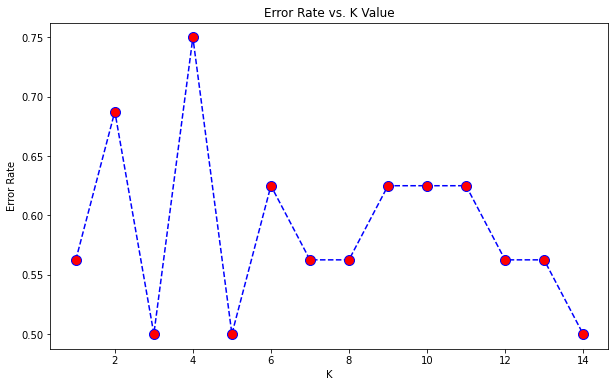

In [3]:
# Find Optimal Value of k
error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i,metric='hamming')
 knn.fit(featuresTrain,targetsTrain)
 predictionTest_i = knn.predict(featuresTest)
 error_rate.append(np.mean(predictionTest_i != targetsTest))

# Calculate Index with Minimum Error Rate
k_min = 100000
for i in range(0,14):
    if error_rate[i] <= k_min:
        k_min = error_rate[i]
        k_index = i + 1
        
# Generate Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", k_index)

k = k_index

In [4]:
# Training for KNN
neigh = KNeighborsClassifier(n_neighbors = k,metric='hamming').fit(featuresTrain, targetsTrain)
predictionTest = neigh.predict(featuresTest)
print("Accuracy of model at K =", k ,"is",metrics.accuracy_score(targetsTest, predictionTest))

print("Target Values:    ", targetsTest.values)
print("Predicted Values: ", predictionTest) 

Accuracy of model at K = 14 is 0.5
Target Values:     [1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
Predicted Values:  [1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]


Experiments with Larger Training Data

Minimum error:- 0.3125 at K = 26
Accuracy of model at K = 26 is 0.6875
Target Values:     [1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
Predicted Values:  [1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]


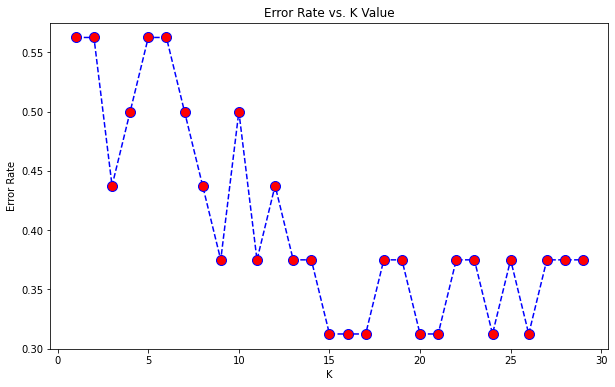

In [5]:
# Import Training and Testing Data

dfTrain = pd.read_csv("../Data/LargeTrainingData.csv")
dfTest = pd.read_csv("../Data/LargeTestingData.csv")

# Define Features and Targets 

targetsTrain = dfTrain["home_team_result"]
featuresTrain = dfTrain.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","winner_encoded","home_team_result"],axis=1)

targetsTest = dfTest["home_team_result"]
featuresTest = dfTest.drop(["home_team_name","away_team_name","home_team_goal_count","away_team_goal_count","home_team_result"],axis=1)

# Find Optimal Value of k
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i,metric='hamming')
 knn.fit(featuresTrain,targetsTrain)
 predictionTest_i = knn.predict(featuresTest)
 error_rate.append(np.mean(predictionTest_i != targetsTest))

# Calculate Index with Minimum Error Rate
k_min = 100000
for i in range(0,29):
    if error_rate[i] <= k_min:
        k_min = error_rate[i]
        k_index = i + 1
        
# Generate Graph
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =", k_index)

k = k_index

# Training for KNN
neigh = KNeighborsClassifier(n_neighbors = k,metric='hamming').fit(featuresTrain, targetsTrain)
predictionTest = neigh.predict(featuresTest)
print("Accuracy of model at K =", k ,"is",metrics.accuracy_score(targetsTest, predictionTest))

print("Target Values:    ", targetsTest.values)
print("Predicted Values: ", predictionTest) 

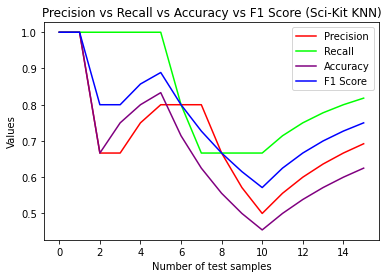

Evaulation Metrics
Accuracy: 62.50%
Precision: 0.69
Recall: 0.82
F1 Score: 0.75


In [6]:
# Precision and Recall
def precisionAndRecall(predictedValues):
    actualValues = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    truePositives = 0
    trueNegatives = 0
    falsePositives = 0
    falseNegatives = 0
    precision = []
    recall = []
    accuracy = []
    f1 = []

    for index in range(len(predictedValues)):
        if(predictedValues[index]==1 and actualValues[index]==1):
            truePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
            
        
        if(predictedValues[index]==1 and actualValues[index]==0):
            falsePositives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))
        
        if(predictedValues[index]==0 and actualValues[index]==0):
            trueNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

        if(predictedValues[index]==0 and actualValues[index]==1):
            falseNegatives += 1
            calculatedPrecision = 0
            calculatedRecall = 0
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append((truePositives+trueNegatives)/(truePositives+trueNegatives+falseNegatives+falsePositives))
            if(calculatedRecall+calculatedPrecision!=0):
                f1.append((2*calculatedPrecision*calculatedRecall)/(calculatedRecall+calculatedPrecision))

    return precision,recall,accuracy,f1

precision, recall, accuracy, f1 = precisionAndRecall(knn.predict(featuresTest))

plt.title("Precision vs Recall vs Accuracy vs F1 Score (Sci-Kit KNN)")
plt.xlabel("Number of test samples")
plt.ylabel("Values")
plt.plot(precision,color = "red", label = "Precision")
plt.plot(recall,color = "lime", label = "Recall")
plt.plot(accuracy,color = "purple", label = "Accuracy")
plt.plot(f1,color = "blue", label = "F1 Score")

plt.legend()
plt.show()

print("Evaulation Metrics")
print("Accuracy: {:.2f}%".format(accuracy[-1]*100))
print("Precision: {:.2f}".format(precision[-1]))
print("Recall: {:.2f}".format(recall[-1]))
print("F1 Score: {:.2f}".format(f1[-1]))